In [1]:
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import cifar10 as cifar10

Using TensorFlow backend.


In [3]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

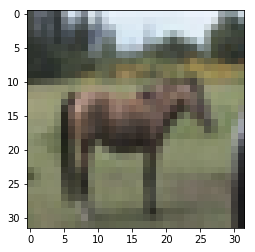

In [23]:
plt.imshow(X_test[-1])

In [5]:
#normalise the X_train and X_test data 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
#turn the y_train and y_test data into categorical data for one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
#make a dictionary for the labels
labels_dict = {0:'airplane',1:'automobile', 2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [8]:
#import the models, layers, constraints, optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [9]:
#make the net structure

#initiate an object for the Sequential class for adding layers
model = Sequential()

#the structure of the deep network is:

#    Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
#    Dropout layer at 20%.
#    Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
#    Max Pool layer with size 2×2.
#    Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
#    Dropout layer at 20%.
#    Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
#    Max Pool layer with size 2×2.
#    Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
#    Dropout layer at 20%.
#    Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
#    Max Pool layer with size 2×2.
#    Flatten layer.
#    Dropout layer at 20%.
#    Fully connected layer with 1024 units and a rectifier activation function.
#    Dropout layer at 20%.
#    Fully connected layer with 512 units and a rectifier activation function.
#    Dropout layer at 20%.
#    Fully connected output layer with 10 units and a softmax activation function.

#add layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering='tf'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/home/ssar0014/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
/home/ssar0014/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`
/home/ssar0014/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_last")`


In [10]:
#optimise the model using the Stochastic Gradient Descent method,
#which uses learning rate, decay rate, momentum and nesterov details

lrate = 0.01
epochs = 100
decay = lrate/epochs
sgd = SGD(lr = lrate, decay = decay, momentum=0.9, nesterov=False)

#compile the model for training
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=epochs)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 305s 6ms/step - loss: 1.8548 - acc: 0.3158 - val_loss: 1.6792 - val_acc: 0.4018
Epoch 2/100
50000/50000 [==============================] - 329s 7ms/step - loss: 1.4189 - acc: 0.4814 - val_loss: 1.2642 - val_acc: 0.5424
Epoch 3/100
50000/50000 [==============================] - 321s 6ms/step - loss: 1.2038 - acc: 0.5669 - val_loss: 1.1321 - val_acc: 0.5968
Epoch 4/100
50000/50000 [==============================] - 311s 6ms/step - loss: 1.0389 - acc: 0.6291 - val_loss: 0.9610 - val_acc: 0.6644
Epoch 5/100
50000/50000 [==============================] - 311s 6ms/step - loss: 0.9151 - acc: 0.6758 - val_loss: 0.8476 - val_acc: 0.7010
Epoch 6/100
50000/50000 [==============================] - 312s 6ms/step - loss: 0.8177 - acc: 0.7109 - val_loss: 0.7825 - val_acc: 0.7269
Epoch 7/100
50000/50000 [==============================] - 315s 6ms/step - loss: 0.7414 - acc: 0.7389 - val_loss: 0.

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [19]:
prediction = model.predict(X_test[:])

In [28]:
prediction[:5]

array([[1.2908107e-11, 1.0564055e-09, 6.1573209e-09, 9.7368240e-01,
        4.3160961e-11, 2.6317544e-02, 3.1395974e-08, 1.2273963e-08,
        7.1083479e-11, 6.4090366e-10],
       [1.6943546e-11, 2.0870701e-12, 7.2556724e-25, 7.9574823e-21,
        6.7882535e-26, 1.0910030e-22, 1.8877557e-20, 9.4656212e-28,
        1.0000000e+00, 7.0481248e-17],
       [1.2865422e-02, 1.5286432e-04, 3.3956564e-08, 1.7670716e-08,
        4.4056483e-06, 1.2345744e-09, 2.0626095e-11, 1.6658851e-07,
        9.8696637e-01, 1.0661451e-05],
       [9.8663217e-01, 7.1901056e-08, 3.3061842e-05, 5.4612599e-08,
        4.2170066e-07, 8.9193084e-13, 6.1313937e-10, 4.3040135e-10,
        1.3334219e-02, 1.0485348e-08],
       [7.4463135e-12, 5.4384023e-12, 1.1547948e-05, 1.3442291e-04,
        1.2616343e-04, 8.9882507e-10, 9.9972779e-01, 6.4069377e-13,
        1.2132276e-10, 6.9750069e-12]], dtype=float32)

In [29]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
elem_list = []
max_index_list = []
for array in prediction:
    for element in array:
        elem_list.append(element)
    max_index_list.append(elem_list.index(max(elem_list)))
    elem_list = []
    
testing_elem_list = []
target_max_index_list = []
for array_test in y_test:
    for elem_test in array_test:
        testing_elem_list.append(elem_test)
    target_max_index_list.append(testing_elem_list.index(max(testing_elem_list)))
    testing_elem_list = []

In [31]:
print(max_index_list)

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 2, 4, 9, 4, 2, 4, 0, 9, 6, 6, 5, 2, 2, 9, 8, 4, 1, 9, 5, 4, 6, 7, 6, 0, 9, 3, 8, 7, 6, 9, 8, 2, 3, 8, 8, 7, 3, 5, 3, 7, 5, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 9, 2, 7, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 2, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 4, 0, 4, 6, 7, 8, 7, 1, 2, 8, 2, 8, 3, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 6, 5, 6, 3, 8, 7, 6, 5, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 0, 1, 3, 6, 0, 4, 8, 6, 9, 4, 9, 0, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 3, 8, 2, 8, 0, 1, 7, 6, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 0, 5, 0, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 3, 4, 3, 6, 5, 1, 3, 8, 8, 0, 4, 2, 5, 5, 1, 1, 8, 9, 0, 6, 1, 8, 2, 2, 5, 3, 9, 9, 2, 3, 3, 0, 8, 9, 8, 1, 5, 3, 1, 8, 8, 4, 7, 0, 2, 5, 6, 3, 8, 3, 0, 4, 4, 3, 9, 1, 6, 1, 9, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 9, 6, 1, 6, 8, 2, 4, 0, 7, 7, 5, 5, 3, 5, 2, 5, 7, 1, 7, 5, 4, 6, 1, 9, 6, 

In [32]:
for index in max_index_list:
    print("Prediction:",labels_dict[index])

Prediction: cat
Prediction: ship
Prediction: ship
Prediction: airplane
Prediction: frog
Prediction: frog
Prediction: automobile
Prediction: bird
Prediction: cat
Prediction: automobile
Prediction: airplane
Prediction: truck
Prediction: dog
Prediction: horse
Prediction: truck
Prediction: ship
Prediction: dog
Prediction: horse
Prediction: ship
Prediction: frog
Prediction: horse
Prediction: bird
Prediction: deer
Prediction: truck
Prediction: deer
Prediction: bird
Prediction: deer
Prediction: airplane
Prediction: truck
Prediction: frog
Prediction: frog
Prediction: dog
Prediction: bird
Prediction: bird
Prediction: truck
Prediction: ship
Prediction: deer
Prediction: automobile
Prediction: truck
Prediction: dog
Prediction: deer
Prediction: frog
Prediction: horse
Prediction: frog
Prediction: airplane
Prediction: truck
Prediction: cat
Prediction: ship
Prediction: horse
Prediction: frog
Prediction: truck
Prediction: ship
Prediction: bird
Prediction: cat
Prediction: ship
Prediction: ship
Predictio

Prediction: deer
Prediction: horse
Prediction: ship
Prediction: frog
Prediction: horse
Prediction: ship
Prediction: truck
Prediction: automobile
Prediction: automobile
Prediction: frog
Prediction: frog
Prediction: bird
Prediction: frog
Prediction: truck
Prediction: automobile
Prediction: truck
Prediction: truck
Prediction: deer
Prediction: dog
Prediction: automobile
Prediction: horse
Prediction: airplane
Prediction: frog
Prediction: ship
Prediction: automobile
Prediction: truck
Prediction: bird
Prediction: truck
Prediction: dog
Prediction: deer
Prediction: horse
Prediction: ship
Prediction: dog
Prediction: automobile
Prediction: bird
Prediction: airplane
Prediction: automobile
Prediction: horse
Prediction: ship
Prediction: horse
Prediction: frog
Prediction: dog
Prediction: ship
Prediction: automobile
Prediction: cat
Prediction: ship
Prediction: dog
Prediction: airplane
Prediction: cat
Prediction: deer
Prediction: ship
Prediction: automobile
Prediction: automobile
Prediction: ship
Predi

Prediction: deer
Prediction: automobile
Prediction: deer
Prediction: bird
Prediction: deer
Prediction: frog
Prediction: cat
Prediction: dog
Prediction: bird
Prediction: ship
Prediction: airplane
Prediction: airplane
Prediction: automobile
Prediction: ship
Prediction: cat
Prediction: automobile
Prediction: cat
Prediction: dog
Prediction: ship
Prediction: deer
Prediction: ship
Prediction: dog
Prediction: ship
Prediction: frog
Prediction: cat
Prediction: dog
Prediction: dog
Prediction: dog
Prediction: airplane
Prediction: ship
Prediction: dog
Prediction: deer
Prediction: horse
Prediction: automobile
Prediction: ship
Prediction: deer
Prediction: bird
Prediction: horse
Prediction: cat
Prediction: deer
Prediction: bird
Prediction: truck
Prediction: frog
Prediction: bird
Prediction: bird
Prediction: deer
Prediction: cat
Prediction: airplane
Prediction: frog
Prediction: airplane
Prediction: automobile
Prediction: cat
Prediction: bird
Prediction: frog
Prediction: horse
Prediction: airplane
Pred

Prediction: frog
Prediction: frog
Prediction: frog
Prediction: dog
Prediction: frog
Prediction: cat
Prediction: deer
Prediction: dog
Prediction: ship
Prediction: ship
Prediction: cat
Prediction: truck
Prediction: dog
Prediction: truck
Prediction: truck
Prediction: frog
Prediction: truck
Prediction: frog
Prediction: automobile
Prediction: cat
Prediction: horse
Prediction: bird
Prediction: airplane
Prediction: cat
Prediction: dog
Prediction: deer
Prediction: horse
Prediction: frog
Prediction: truck
Prediction: ship
Prediction: bird
Prediction: cat
Prediction: truck
Prediction: dog
Prediction: cat
Prediction: horse
Prediction: ship
Prediction: cat
Prediction: cat
Prediction: cat
Prediction: automobile
Prediction: frog
Prediction: automobile
Prediction: deer
Prediction: horse
Prediction: cat
Prediction: ship
Prediction: horse
Prediction: horse
Prediction: ship
Prediction: cat
Prediction: airplane
Prediction: cat
Prediction: bird
Prediction: cat
Prediction: deer
Prediction: automobile
Predi

Prediction: airplane
Prediction: deer
Prediction: truck
Prediction: airplane
Prediction: bird
Prediction: bird
Prediction: airplane
Prediction: frog
Prediction: ship
Prediction: horse
Prediction: cat
Prediction: cat
Prediction: ship
Prediction: truck
Prediction: airplane
Prediction: dog
Prediction: bird
Prediction: cat
Prediction: frog
Prediction: automobile
Prediction: cat
Prediction: ship
Prediction: dog
Prediction: truck
Prediction: dog
Prediction: deer
Prediction: deer
Prediction: airplane
Prediction: automobile
Prediction: dog
Prediction: bird
Prediction: automobile
Prediction: horse
Prediction: truck
Prediction: ship
Prediction: frog
Prediction: bird
Prediction: deer
Prediction: horse
Prediction: ship
Prediction: dog
Prediction: deer
Prediction: horse
Prediction: cat
Prediction: bird
Prediction: ship
Prediction: deer
Prediction: ship
Prediction: dog
Prediction: ship
Prediction: ship
Prediction: ship
Prediction: deer
Prediction: cat
Prediction: dog
Prediction: horse
Prediction: de

Prediction: frog
Prediction: automobile
Prediction: bird
Prediction: truck
Prediction: airplane
Prediction: airplane
Prediction: automobile
Prediction: dog
Prediction: dog
Prediction: automobile
Prediction: frog
Prediction: horse
Prediction: ship
Prediction: deer
Prediction: frog
Prediction: cat
Prediction: cat
Prediction: frog
Prediction: airplane
Prediction: automobile
Prediction: truck
Prediction: bird
Prediction: bird
Prediction: frog
Prediction: automobile
Prediction: deer
Prediction: frog
Prediction: bird
Prediction: dog
Prediction: horse
Prediction: ship
Prediction: ship
Prediction: cat
Prediction: frog
Prediction: deer
Prediction: cat
Prediction: bird
Prediction: cat
Prediction: bird
Prediction: deer
Prediction: deer
Prediction: ship
Prediction: truck
Prediction: bird
Prediction: frog
Prediction: airplane
Prediction: truck
Prediction: horse
Prediction: truck
Prediction: ship
Prediction: horse
Prediction: horse
Prediction: cat
Prediction: ship
Prediction: bird
Prediction: truck


Prediction: horse
Prediction: horse
Prediction: bird
Prediction: frog
Prediction: automobile
Prediction: ship
Prediction: bird
Prediction: truck
Prediction: deer
Prediction: cat
Prediction: bird
Prediction: bird
Prediction: cat
Prediction: cat
Prediction: dog
Prediction: airplane
Prediction: bird
Prediction: automobile
Prediction: airplane
Prediction: ship
Prediction: airplane
Prediction: ship
Prediction: bird
Prediction: bird
Prediction: bird
Prediction: dog
Prediction: horse
Prediction: truck
Prediction: ship
Prediction: cat
Prediction: frog
Prediction: automobile
Prediction: bird
Prediction: ship
Prediction: frog
Prediction: bird
Prediction: dog
Prediction: ship
Prediction: truck
Prediction: deer
Prediction: horse
Prediction: ship
Prediction: airplane
Prediction: bird
Prediction: truck
Prediction: automobile
Prediction: ship
Prediction: cat
Prediction: horse
Prediction: dog
Prediction: ship
Prediction: bird
Prediction: truck
Prediction: cat
Prediction: ship
Prediction: truck
Predict

Prediction: cat
Prediction: bird
Prediction: bird
Prediction: ship
Prediction: truck
Prediction: dog
Prediction: truck
Prediction: bird
Prediction: automobile
Prediction: horse
Prediction: deer
Prediction: deer
Prediction: airplane
Prediction: horse
Prediction: horse
Prediction: automobile
Prediction: dog
Prediction: deer
Prediction: bird
Prediction: ship
Prediction: deer
Prediction: truck
Prediction: ship
Prediction: horse
Prediction: ship
Prediction: deer
Prediction: bird
Prediction: cat
Prediction: deer
Prediction: airplane
Prediction: dog
Prediction: deer
Prediction: automobile
Prediction: ship
Prediction: bird
Prediction: dog
Prediction: deer
Prediction: dog
Prediction: deer
Prediction: dog
Prediction: cat
Prediction: horse
Prediction: truck
Prediction: dog
Prediction: automobile
Prediction: deer
Prediction: truck
Prediction: cat
Prediction: automobile
Prediction: frog
Prediction: cat
Prediction: dog
Prediction: automobile
Prediction: horse
Prediction: automobile
Prediction: horse

Prediction: horse
Prediction: airplane
Prediction: cat
Prediction: deer
Prediction: truck
Prediction: airplane
Prediction: frog
Prediction: dog
Prediction: automobile
Prediction: dog
Prediction: ship
Prediction: frog
Prediction: ship
Prediction: automobile
Prediction: truck
Prediction: frog
Prediction: horse
Prediction: frog
Prediction: bird
Prediction: airplane
Prediction: frog
Prediction: airplane
Prediction: automobile
Prediction: cat
Prediction: automobile
Prediction: automobile
Prediction: dog
Prediction: cat
Prediction: dog
Prediction: cat
Prediction: cat
Prediction: ship
Prediction: automobile
Prediction: frog
Prediction: frog
Prediction: automobile
Prediction: ship
Prediction: ship
Prediction: frog
Prediction: bird
Prediction: horse
Prediction: deer
Prediction: cat
Prediction: ship
Prediction: truck
Prediction: cat
Prediction: deer
Prediction: cat
Prediction: dog
Prediction: bird
Prediction: automobile
Prediction: deer
Prediction: automobile
Prediction: horse
Prediction: dog
Pr

Prediction: automobile
Prediction: ship
Prediction: horse
Prediction: truck
Prediction: airplane
Prediction: deer
Prediction: horse
Prediction: deer
Prediction: cat
Prediction: deer
Prediction: truck
Prediction: dog
Prediction: truck
Prediction: truck
Prediction: horse
Prediction: deer
Prediction: dog
Prediction: ship
Prediction: automobile
Prediction: deer
Prediction: horse
Prediction: truck
Prediction: automobile
Prediction: ship
Prediction: ship
Prediction: frog
Prediction: cat
Prediction: horse
Prediction: airplane
Prediction: dog
Prediction: truck
Prediction: frog
Prediction: bird
Prediction: cat
Prediction: cat
Prediction: bird
Prediction: truck
Prediction: horse
Prediction: horse
Prediction: frog
Prediction: ship
Prediction: dog
Prediction: frog
Prediction: automobile
Prediction: frog
Prediction: dog
Prediction: truck
Prediction: truck
Prediction: truck
Prediction: cat
Prediction: airplane
Prediction: airplane
Prediction: cat
Prediction: airplane
Prediction: bird
Prediction: shi

In [35]:
for item in target_max_index_list:
    print("Actual:",labels_dict[item])

Actual: cat
Actual: ship
Actual: ship
Actual: airplane
Actual: frog
Actual: frog
Actual: automobile
Actual: frog
Actual: cat
Actual: automobile
Actual: airplane
Actual: truck
Actual: dog
Actual: horse
Actual: truck
Actual: ship
Actual: dog
Actual: horse
Actual: ship
Actual: frog
Actual: horse
Actual: airplane
Actual: deer
Actual: truck
Actual: dog
Actual: bird
Actual: deer
Actual: airplane
Actual: truck
Actual: frog
Actual: frog
Actual: dog
Actual: deer
Actual: dog
Actual: truck
Actual: bird
Actual: deer
Actual: automobile
Actual: truck
Actual: dog
Actual: deer
Actual: frog
Actual: dog
Actual: frog
Actual: airplane
Actual: truck
Actual: cat
Actual: truck
Actual: horse
Actual: frog
Actual: truck
Actual: ship
Actual: airplane
Actual: cat
Actual: ship
Actual: ship
Actual: horse
Actual: horse
Actual: deer
Actual: frog
Actual: horse
Actual: cat
Actual: frog
Actual: cat
Actual: frog
Actual: bird
Actual: automobile
Actual: bird
Actual: cat
Actual: horse
Actual: bird
Actual: frog
Actual: ship


Actual: truck
Actual: bird
Actual: cat
Actual: automobile
Actual: truck
Actual: automobile
Actual: truck
Actual: frog
Actual: cat
Actual: cat
Actual: cat
Actual: automobile
Actual: airplane
Actual: frog
Actual: automobile
Actual: deer
Actual: automobile
Actual: airplane
Actual: airplane
Actual: automobile
Actual: automobile
Actual: frog
Actual: dog
Actual: deer
Actual: frog
Actual: bird
Actual: airplane
Actual: horse
Actual: truck
Actual: ship
Actual: horse
Actual: bird
Actual: airplane
Actual: frog
Actual: ship
Actual: automobile
Actual: deer
Actual: cat
Actual: horse
Actual: airplane
Actual: frog
Actual: automobile
Actual: ship
Actual: dog
Actual: horse
Actual: ship
Actual: deer
Actual: ship
Actual: cat
Actual: truck
Actual: truck
Actual: truck
Actual: ship
Actual: horse
Actual: frog
Actual: frog
Actual: cat
Actual: dog
Actual: automobile
Actual: dog
Actual: truck
Actual: automobile
Actual: deer
Actual: automobile
Actual: dog
Actual: horse
Actual: airplane
Actual: automobile
Actual: 

Actual: horse
Actual: airplane
Actual: dog
Actual: frog
Actual: airplane
Actual: automobile
Actual: automobile
Actual: ship
Actual: deer
Actual: dog
Actual: cat
Actual: automobile
Actual: bird
Actual: deer
Actual: ship
Actual: truck
Actual: ship
Actual: automobile
Actual: horse
Actual: bird
Actual: horse
Actual: bird
Actual: cat
Actual: bird
Actual: frog
Actual: horse
Actual: truck
Actual: deer
Actual: airplane
Actual: automobile
Actual: airplane
Actual: deer
Actual: dog
Actual: airplane
Actual: ship
Actual: airplane
Actual: horse
Actual: frog
Actual: automobile
Actual: airplane
Actual: ship
Actual: dog
Actual: truck
Actual: bird
Actual: dog
Actual: deer
Actual: deer
Actual: truck
Actual: airplane
Actual: frog
Actual: automobile
Actual: bird
Actual: dog
Actual: automobile
Actual: frog
Actual: horse
Actual: automobile
Actual: dog
Actual: ship
Actual: ship
Actual: airplane
Actual: cat
Actual: truck
Actual: deer
Actual: airplane
Actual: cat
Actual: deer
Actual: truck
Actual: bird
Actual: 

Actual: dog
Actual: airplane
Actual: bird
Actual: ship
Actual: dog
Actual: airplane
Actual: airplane
Actual: frog
Actual: bird
Actual: airplane
Actual: ship
Actual: deer
Actual: dog
Actual: deer
Actual: dog
Actual: frog
Actual: deer
Actual: horse
Actual: truck
Actual: deer
Actual: bird
Actual: airplane
Actual: frog
Actual: deer
Actual: airplane
Actual: airplane
Actual: frog
Actual: deer
Actual: frog
Actual: automobile
Actual: truck
Actual: dog
Actual: dog
Actual: bird
Actual: bird
Actual: frog
Actual: cat
Actual: deer
Actual: dog
Actual: truck
Actual: automobile
Actual: horse
Actual: bird
Actual: cat
Actual: truck
Actual: frog
Actual: dog
Actual: airplane
Actual: bird
Actual: truck
Actual: horse
Actual: automobile
Actual: horse
Actual: bird
Actual: bird
Actual: airplane
Actual: ship
Actual: frog
Actual: deer
Actual: cat
Actual: bird
Actual: horse
Actual: horse
Actual: airplane
Actual: deer
Actual: automobile
Actual: frog
Actual: dog
Actual: automobile
Actual: cat
Actual: airplane
Actua

Actual: ship
Actual: frog
Actual: frog
Actual: airplane
Actual: cat
Actual: deer
Actual: horse
Actual: deer
Actual: truck
Actual: deer
Actual: truck
Actual: truck
Actual: cat
Actual: deer
Actual: automobile
Actual: deer
Actual: airplane
Actual: cat
Actual: horse
Actual: automobile
Actual: bird
Actual: bird
Actual: ship
Actual: deer
Actual: horse
Actual: ship
Actual: dog
Actual: dog
Actual: frog
Actual: dog
Actual: frog
Actual: airplane
Actual: frog
Actual: deer
Actual: truck
Actual: cat
Actual: bird
Actual: horse
Actual: cat
Actual: ship
Actual: cat
Actual: truck
Actual: deer
Actual: automobile
Actual: frog
Actual: truck
Actual: truck
Actual: deer
Actual: cat
Actual: truck
Actual: ship
Actual: automobile
Actual: frog
Actual: truck
Actual: dog
Actual: truck
Actual: airplane
Actual: truck
Actual: horse
Actual: bird
Actual: bird
Actual: deer
Actual: bird
Actual: frog
Actual: deer
Actual: ship
Actual: automobile
Actual: truck
Actual: dog
Actual: frog
Actual: dog
Actual: automobile
Actual: 

Actual: cat
Actual: bird
Actual: cat
Actual: deer
Actual: deer
Actual: deer
Actual: ship
Actual: truck
Actual: bird
Actual: frog
Actual: airplane
Actual: truck
Actual: horse
Actual: truck
Actual: ship
Actual: horse
Actual: horse
Actual: cat
Actual: ship
Actual: bird
Actual: truck
Actual: cat
Actual: dog
Actual: horse
Actual: dog
Actual: ship
Actual: horse
Actual: cat
Actual: horse
Actual: airplane
Actual: horse
Actual: automobile
Actual: frog
Actual: bird
Actual: deer
Actual: airplane
Actual: airplane
Actual: bird
Actual: truck
Actual: ship
Actual: bird
Actual: ship
Actual: horse
Actual: horse
Actual: dog
Actual: dog
Actual: airplane
Actual: automobile
Actual: bird
Actual: truck
Actual: frog
Actual: automobile
Actual: airplane
Actual: automobile
Actual: airplane
Actual: frog
Actual: dog
Actual: airplane
Actual: dog
Actual: horse
Actual: deer
Actual: deer
Actual: ship
Actual: cat
Actual: dog
Actual: cat
Actual: horse
Actual: bird
Actual: dog
Actual: ship
Actual: cat
Actual: dog
Actual: 

Actual: cat
Actual: dog
Actual: truck
Actual: deer
Actual: dog
Actual: bird
Actual: airplane
Actual: dog
Actual: horse
Actual: bird
Actual: cat
Actual: truck
Actual: deer
Actual: dog
Actual: ship
Actual: automobile
Actual: truck
Actual: cat
Actual: automobile
Actual: ship
Actual: dog
Actual: ship
Actual: frog
Actual: frog
Actual: cat
Actual: deer
Actual: airplane
Actual: bird
Actual: cat
Actual: bird
Actual: frog
Actual: automobile
Actual: ship
Actual: bird
Actual: automobile
Actual: cat
Actual: frog
Actual: bird
Actual: bird
Actual: cat
Actual: cat
Actual: dog
Actual: airplane
Actual: bird
Actual: automobile
Actual: bird
Actual: ship
Actual: airplane
Actual: ship
Actual: bird
Actual: bird
Actual: horse
Actual: cat
Actual: dog
Actual: truck
Actual: ship
Actual: cat
Actual: frog
Actual: automobile
Actual: airplane
Actual: ship
Actual: frog
Actual: cat
Actual: dog
Actual: ship
Actual: truck
Actual: deer
Actual: ship
Actual: airplane
Actual: airplane
Actual: bird
Actual: truck
Actual: aut

Actual: frog
Actual: truck
Actual: deer
Actual: ship
Actual: truck
Actual: cat
Actual: airplane
Actual: dog
Actual: horse
Actual: bird
Actual: airplane
Actual: bird
Actual: truck
Actual: truck
Actual: cat
Actual: ship
Actual: horse
Actual: automobile
Actual: automobile
Actual: bird
Actual: bird
Actual: bird
Actual: dog
Actual: truck
Actual: automobile
Actual: bird
Actual: frog
Actual: automobile
Actual: bird
Actual: automobile
Actual: ship
Actual: truck
Actual: bird
Actual: cat
Actual: automobile
Actual: truck
Actual: truck
Actual: deer
Actual: deer
Actual: dog
Actual: dog
Actual: airplane
Actual: cat
Actual: cat
Actual: horse
Actual: automobile
Actual: horse
Actual: horse
Actual: truck
Actual: ship
Actual: frog
Actual: cat
Actual: dog
Actual: dog
Actual: automobile
Actual: frog
Actual: bird
Actual: horse
Actual: ship
Actual: deer
Actual: cat
Actual: cat
Actual: dog
Actual: truck
Actual: frog
Actual: ship
Actual: dog
Actual: automobile
Actual: airplane
Actual: frog
Actual: horse
Actual

Actual: dog
Actual: frog
Actual: cat
Actual: ship
Actual: truck
Actual: dog
Actual: frog
Actual: automobile
Actual: deer
Actual: dog
Actual: deer
Actual: frog
Actual: horse
Actual: bird
Actual: automobile
Actual: airplane
Actual: bird
Actual: airplane
Actual: deer
Actual: truck
Actual: ship
Actual: ship
Actual: truck
Actual: automobile
Actual: automobile
Actual: dog
Actual: airplane
Actual: airplane
Actual: ship
Actual: horse
Actual: automobile
Actual: horse
Actual: deer
Actual: dog
Actual: deer
Actual: cat
Actual: cat
Actual: bird
Actual: airplane
Actual: frog
Actual: frog
Actual: airplane
Actual: automobile
Actual: cat
Actual: truck
Actual: ship
Actual: cat
Actual: horse
Actual: ship
Actual: truck
Actual: deer
Actual: ship
Actual: truck
Actual: airplane
Actual: truck
Actual: horse
Actual: automobile
Actual: frog
Actual: bird
Actual: truck
Actual: dog
Actual: frog
Actual: truck
Actual: cat
Actual: truck
Actual: ship
Actual: horse
Actual: horse
Actual: automobile
Actual: frog
Actual: d